In [6]:
import os
import shutil 

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [3]:
path_main = os.getcwd()
print(path_main)

path_images = path_main + '/dogs-vs-cats-small/train/dogs'
print(path_images)

/Users/konrad/DS_ML/Python/SpecificEnv/keras_tensorflow
/Users/konrad/DS_ML/Python/SpecificEnv/keras_tensorflow/dogs-vs-cats-small/train/dogs


In [5]:
fnames = os.listdir(path_images)

In [71]:
img_path = path_images + '/' + fnames[0]
print(img_path)

/Users/konrad/DS_ML/Python/SpecificEnv/keras_tensorflow/dogs-vs-cats-small/train/dogs/dog.775.jpg


In [141]:
img = tf.keras.preprocessing.image.load_img(img_path, target_size = (150, 150))

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape((1, 150, 150, 3)) # 1 stands for batch of 1 (just single image at a time)

In [177]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1. / 255, 
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [178]:
augmentation_gen = data_gen.flow(img_array, batch_size = 1) # that's just a data generation function

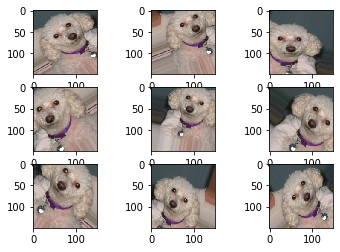

In [182]:
from matplotlib import pyplot

for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = augmentation_gen.next()
    # convert to unsigned integers for viewing
    image = batch[0]
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()